# Time Series Analysis for Netflix


Name: Stephen Connolly
Student Number:15449388

This notebook uses the Netflix stock data given on the link of the assignment. I chose this file due to the meteoric rise Netflix has experienced and the popularity of streaming services today.

In [382]:
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline 

I used the read_html function to read in the required data. However, this only works for one yeat at a time. I have done this for all years between 2013-2017 inclusive

In [383]:
Netflix13 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/nflx.html")[0]

In [384]:
Netflix13.tail(5)

,Day,Month,Year,Open,High,Low,Close
247,24,12,2013,54.394287,54.851429,53.925713,54.055714
248,26,12,2013,54.015713,54.415714,53.689999,53.847141
249,27,12,2013,53.872856,54.107143,52.258572,52.500000
250,30,12,2013,52.517143,52.791428,51.291428,52.427143
251,31,12,2013,52.214287,52.735714,51.947144,52.595715


# Data Parsing

In [385]:
Netflix14 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/nflx.html")[1]

In [386]:
Netflix15 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/nflx.html")[2]

In [387]:
Netflix16 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/nflx.html")[3]

In [388]:
Netflix17 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/nflx.html")[4]

In [389]:
Netflix14.head(3)

,Day,Month,Year,Open,High,Low,Close
0,2,1,2014,52.401428,52.511429,51.542858,51.831429
1,3,1,2014,52.000000,52.495716,51.842857,51.871429
2,6,1,2014,51.889999,52.044285,50.475716,51.367142


I placed all these data frames into an array and then concatenated them together

In [390]:
frames = [Netflix13, Netflix14, Netflix15, Netflix16, Netflix17]

In [391]:
result = pd.concat(frames)

In [392]:
result.head(3)

,Day,Month,Year,Open,High,Low,Close
0,2,1,2013,13.601429,13.687143,12.955714,13.144286
1,3,1,2013,13.138572,13.988571,13.075714,13.798572
2,4,1,2013,13.791429,13.958571,13.648571,13.711429


In [393]:
result.head(256).tail(5)

,Day,Month,Year,Open,High,Low,Close
251,31,12,2013,52.214287,52.735714,51.947144,52.595715
0,2,1,2014,52.401428,52.511429,51.542858,51.831429
1,3,1,2014,52.000000,52.495716,51.842857,51.871429
2,6,1,2014,51.889999,52.044285,50.475716,51.367142
3,7,1,2014,49.684284,49.698570,48.152859,48.500000


As can be seen above, the index reverts back to 0 when the year changes. The following cell resets the index to rectify this issue

In [394]:
tailored = result.reset_index(drop = True)

In [395]:
tailored.head(256).tail(5)

,Day,Month,Year,Open,High,Low,Close
251,31,12,2013,52.214287,52.735714,51.947144,52.595715
252,2,1,2014,52.401428,52.511429,51.542858,51.831429
253,3,1,2014,52.000000,52.495716,51.842857,51.871429
254,6,1,2014,51.889999,52.044285,50.475716,51.367142
255,7,1,2014,49.684284,49.698570,48.152859,48.500000


In [396]:
tailored.tail(3)

,Day,Month,Year,Open,High,Low,Close
1256,27,12,2017,187.800003,188.100006,185.220001,186.240005
1257,28,12,2017,187.179993,194.490005,186.850006,192.710007
1258,29,12,2017,192.509995,193.949997,191.220001,191.960007


In [397]:
tailored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
Day      1259 non-null int64
Month    1259 non-null int64
Year     1259 non-null int64
Open     1259 non-null float64
High     1259 non-null float64
Low      1259 non-null float64
Close    1259 non-null float64
dtypes: float64(4), int64(3)
memory usage: 68.9 KB


Inserting new column called time. This column will have the date in the yyyy-mm-dd format for datetime index

In [398]:
tailored.insert(0, 'Time', "")

In [399]:
tailored.head(3)

,Time,Day,Month,Year,Open,High,Low,Close
0,,2,1,2013,13.601429,13.687143,12.955714,13.144286
1,,3,1,2013,13.138572,13.988571,13.075714,13.798572
2,,4,1,2013,13.791429,13.958571,13.648571,13.711429


In [400]:
tailored['Time'] = tailored['Time'].astype(str)

In [401]:
tailored.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
Time     1259 non-null object
Day      1259 non-null int64
Month    1259 non-null int64
Year     1259 non-null int64
Open     1259 non-null float64
High     1259 non-null float64
Low      1259 non-null float64
Close    1259 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 78.8+ KB


In [402]:
tailored['Time'] = " "

The next piece of code fills the time column with the values of the columns day, month and year

In [403]:
tailored['Time'] = tailored.Year.map(str) + "-" + tailored.Month.map(str) + "-" + tailored.Day.map(str)

In [404]:
tailored.head(3)

,Time,Day,Month,Year,Open,High,Low,Close
0,2013-1-2,2,1,2013,13.601429,13.687143,12.955714,13.144286
1,2013-1-3,3,1,2013,13.138572,13.988571,13.075714,13.798572
2,2013-1-4,4,1,2013,13.791429,13.958571,13.648571,13.711429


In [405]:
tailored.head(1300).tail(3)

,Time,Day,Month,Year,Open,High,Low,Close
1256,2017-12-27,27,12,2017,187.800003,188.100006,185.220001,186.240005
1257,2017-12-28,28,12,2017,187.179993,194.490005,186.850006,192.710007
1258,2017-12-29,29,12,2017,192.509995,193.949997,191.220001,191.960007


As the two above examples show, there is a issue with the number of characters in the Time column. We want all of them in the same format totalling 10 characters including the 2 dashes('-'): yyyy-mm-dd. The script below rectifies this solution

In [406]:
for x in range(len(tailored)):
    index = tailored.iloc[x].name
    time = tailored.Time.iloc[x]
    
    if(len(time) == 8):
        result = time[:5] + "0" + time[5:]
        final_result = result[:8] + "0" + result[8:]
        tailored.set_value(index, "Time", final_result)
        
    if(len(time) == 9):
        sample = time.split("-")#Split the string by the dash
        if len(sample[1]) == 1:
            final_result = time[:5] + "0" + time[5:]
            tailored.set_value(index, "Time", final_result)
            
        if len(sample[2]) == 1:
            final_result = time[:8] + "0" + time[8:]
            tailored.set_value(index, "Time", final_result)

   #No need to worry about len = 10 because that is correct already
    
   

In [407]:
tailored.head(30).tail(5)

,Time,Day,Month,Year,Open,High,Low,Close
25,2013-02-07,7,2,2013,26.535715,26.982857,25.505714,25.994286
26,2013-02-08,8,2,2013,25.962856,26.280001,25.715714,25.852858
27,2013-02-11,11,2,2013,25.568571,26.007143,24.971428,25.412857
28,2013-02-12,12,2,2013,25.808571,26.222857,25.101429,25.421429
29,2013-02-13,13,2,2013,25.842857,26.628571,25.665714,26.610001


In [408]:
tailored.set_index("Time", inplace = True)

In [409]:
tailored.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2013-01-02 to 2017-12-29
Data columns (total 7 columns):
Day      1259 non-null int64
Month    1259 non-null int64
Year     1259 non-null int64
Open     1259 non-null float64
High     1259 non-null float64
Low      1259 non-null float64
Close    1259 non-null float64
dtypes: float64(4), int64(3)
memory usage: 78.7+ KB


The index is now set to the column "Time". But we need to chage it from index to datetime index

In [410]:
tailored.index = pd.to_datetime(tailored.index)

In [411]:
tailored.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-01-02 to 2017-12-29
Data columns (total 7 columns):
Day      1259 non-null int64
Month    1259 non-null int64
Year     1259 non-null int64
Open     1259 non-null float64
High     1259 non-null float64
Low      1259 non-null float64
Close    1259 non-null float64
dtypes: float64(4), int64(3)
memory usage: 78.7 KB


We want to drop the Day, Month and Year columns now that we have that information in the datetime index

In [412]:
tailor1 = tailored.drop(["Day"], axis = 1)
tailor2 = tailor1.drop(["Month"], axis = 1)
df1 = tailor2.drop(["Year"], axis = 1)



In [413]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-01-02 to 2017-12-29
Data columns (total 4 columns):
Open     1259 non-null float64
High     1259 non-null float64
Low      1259 non-null float64
Close    1259 non-null float64
dtypes: float64(4)
memory usage: 49.2 KB


This example shows how the dataset entries can be accessed 

In [414]:
day9 = df1[df1.index.day == 9]

In [415]:
day9.count()

Open     42
High     42
Low      42
Close    42
dtype: int64

In [416]:
day9.head(200).tail(5)

,Open,High,Low,Close
Time,,,,
2017-05-09,156.100006,157.850006,155.970001,157.460007
2017-06-09,166.270004,166.270004,154.500000,158.029999
2017-08-09,171.429993,175.960007,170.009995,175.779999
2017-10-09,199.100006,199.399994,196.559998,196.869995
2017-11-09,194.460007,194.490005,190.809998,193.899994


# Data Analysis


This plot just plots the entire dataset, so it would be on a daily basis. As we can see from the graph, there is a positive correlation between the rise in the prices of the stock. On a daily basis the prices can rise and fall dramatically

Text(0,0.5,'Price of Stock')

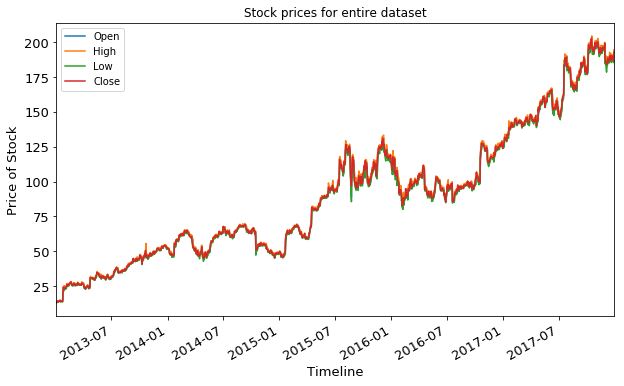

In [417]:
p = df1.plot(figsize=(10, 6), fontsize=13, title = "Stock prices for entire dataset")
p.set_xlabel("Timeline",fontsize=13)
p.set_ylabel("Price of Stock",fontsize=13)

I wanted to investigate the relationship between High and Low seeing as they are opposites of each other. I was particularly interested in the size of the difference between. For this I dropped the "Open" and "Close" columns from the dataset

In [418]:
hold = df1.drop(["Open"], axis = 1)
df_high_low = hold.drop(["Close"], axis = 1)
df_high_low.head(3)

,High,Low
Time,,
2013-01-02,13.687143,12.955714
2013-01-03,13.988571,13.075714
2013-01-04,13.958571,13.648571


Inserting a new column that will store the difference between the two

In [419]:
df_high_low.insert(2, 'Difference', "")
df_high_low.head(3)

,High,Low,Difference
Time,,,
2013-01-02,13.687143,12.955714,
2013-01-03,13.988571,13.075714,
2013-01-04,13.958571,13.648571,


In [420]:
for x in range(len(df_high_low)):
    index = df_high_low.iloc[x].name
    high = df_high_low.High.iloc[x]
    low = df_high_low.Low.iloc[x]
    
    result = high - low
    df_high_low.set_value(index, "Difference", result)
    

In [421]:
df_high_low.head(3)

,High,Low,Difference
Time,,,
2013-01-02,13.687143,12.955714,0.731429
2013-01-03,13.988571,13.075714,0.912857
2013-01-04,13.958571,13.648571,0.31


Text(0,0.5,'Price of Stocks')

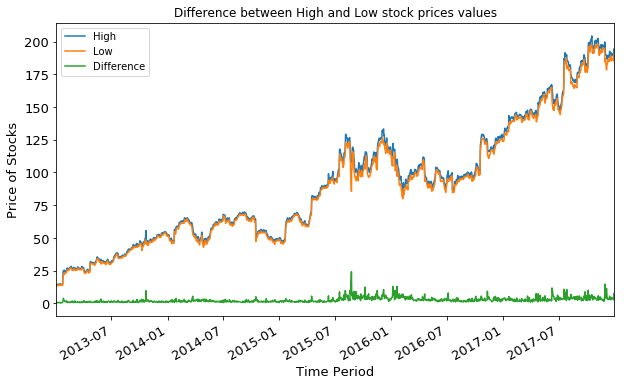

In [422]:
ts18 = df_high_low.plot(figsize=(10, 6), fontsize=13, title = "Difference between High and Low stock prices values")
ts18.set_xlabel("Time Period",fontsize=13)
ts18.set_ylabel("Price of Stocks",fontsize=13)

The graph above shows the high and low stock prices, with the green line below indicating the difference between the two for a given day

In [423]:
df_high_low1.Difference = df_high_low1.Difference.astype(float)

In [424]:
df_high_low1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-01-02 to 2017-12-29
Data columns (total 3 columns):
High          1259 non-null float64
Low           1259 non-null float64
Difference    1259 non-null float64
dtypes: float64(3)
memory usage: 79.3 KB


In [425]:
df_high_low1.nlargest(10, 'Difference')

,High,Low,Difference
Time,,,
2017-11-29,199.029999,184.320007,10.760010
2013-10-22,55.594284,45.928570,9.331429
2017-06-09,166.270004,154.500000,8.240005
2017-09-25,186.550003,177.699997,7.910004
2016-01-13,114.480003,104.529999,7.870002
2016-11-10,122.970001,113.699997,7.340004
2015-08-20,121.449997,111.339996,7.310005
2017-07-27,190.000000,179.380005,7.210006
2015-09-08,102.500000,93.550003,7.130005


As we can see from the results of the table above, the largest difference between the two occured on the 24th August 2015. We can now go and investigate that date in the full dataset

Viewing the entry that has the largest difference between its high and low prices

In [426]:
df1["2015-08-24":"2015-08-24"]

,Open,High,Low,Close
Time,,,,
2015-08-24,88.75,109.629997,85.5,96.879997


I decided to do the same for Open and Close to see if there were any similarities between the two

In [427]:
hold1 = df1.drop(["High"], axis = 1)
df_open_close = hold1.drop(["Low"], axis = 1)
df_open_close.insert(2, 'Difference', " ")

In [428]:
for x in range(len(df_open_close)):
    index = df_open_close.iloc[x].name
    open1 = df_open_close.Open.iloc[x]
    close1 = df_open_close.Close.iloc[x]
    
    result = open1 - close1
    df_open_close.set_value(index, "Difference", result)
    

Text(0,0.5,'Price of Stocks')

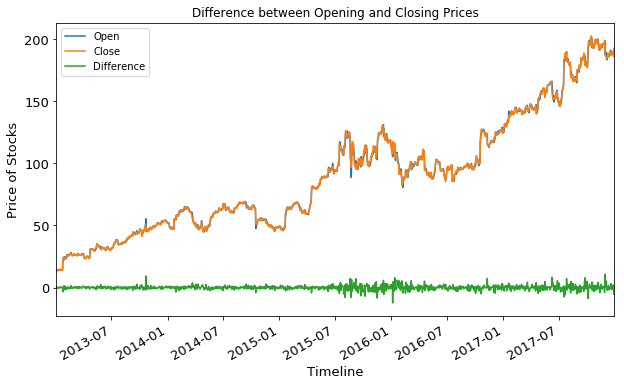

In [429]:
ts20 = df_open_close.plot(figsize=(10, 6), fontsize=13, title = "Difference between Opening and Closing Prices")
ts20.set_xlabel("Timeline",fontsize=13)
ts20.set_ylabel("Price of Stocks",fontsize=13)

In [430]:
df_high_low1.nlargest(10, 'Difference')

,High,Low,Difference
Time,,,
2017-11-29,199.029999,184.320007,10.760010
2013-10-22,55.594284,45.928570,9.331429
2017-06-09,166.270004,154.500000,8.240005
2017-09-25,186.550003,177.699997,7.910004
2016-01-13,114.480003,104.529999,7.870002
2016-11-10,122.970001,113.699997,7.340004
2015-08-20,121.449997,111.339996,7.310005
2017-07-27,190.000000,179.380005,7.210006
2015-09-08,102.500000,93.550003,7.130005


Judging these results, it seems that there is a greater difference between High and Low than there is of Open and Close. Due to my limited knowledge of stock prices I am not sure if that is to be expected

In [431]:
df_month = df1.groupby(df1.index.month).mean()
df_month.head(15)

,Open,High,Low,Close
Time,,,,
1,71.363748,72.584045,69.827001,71.263805
2,77.294970,78.426875,76.178929,77.391429
3,80.001429,80.919854,78.948082,79.879008
4,77.006387,77.956085,75.761319,76.872129
5,84.016389,85.169703,83.148154,84.299703
6,88.970641,89.869733,87.647343,88.726662
7,91.372561,92.725040,90.137062,91.598396
8,98.323286,99.881740,96.981870,98.489896
9,97.596117,98.873731,96.209001,97.544980


This example groups the dates by month and calculates the average prices for each month. The results of this graph can be seen below. It seems that the average prices take a dip during the month of April. They take other slight dips on September(9th month) and December(12th month)

Text(0,0.5,'Price of Stocks')

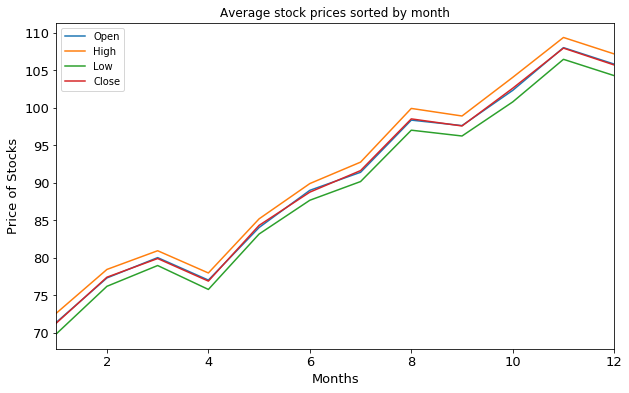

In [432]:
ts5 = df_month.plot(figsize=(10, 6), fontsize=13, title = "Average stock prices sorted by month")
ts5.set_xlabel("Months",fontsize=13)
ts5.set_ylabel("Price of Stocks",fontsize=13)

Since April is the month where the average stock prices appear to be the lowest, that month is the next point of interest. I will use a dataset that only contains entries with that month

In [433]:
april4 = df1[df1.index.month == 4]

In [434]:
april4.tail(3)

,Open,High,Low,Close
Time,,,,
2017-04-26,151.529999,152.149994,148.899994,150.169998
2017-04-27,150.600006,153.490005,149.300003,153.080002
2017-04-28,152.710007,152.970001,150.940002,152.199997


In [435]:
ap4= april4.groupby(april4.index.day).mean()#Grouping the month by day and getting the average for each day

In [436]:
ap4.head(31)

,Open,High,Low,Close
Time,,,,
1,60.025357,61.277857,59.336430,60.719285
2,45.860001,46.356190,45.068095,45.411904
3,74.537142,75.214284,73.073335,73.946189
4,81.857142,82.042856,79.868570,80.462499
5,91.006668,92.119048,89.909522,90.694285
6,102.689524,103.675715,101.908094,102.966670
7,89.310355,90.230000,88.413573,89.084999
8,59.647500,60.576787,58.764999,59.998927
9,45.500953,46.058096,44.761904,45.804286


Text(0,0.5,'Prices of Stocks')

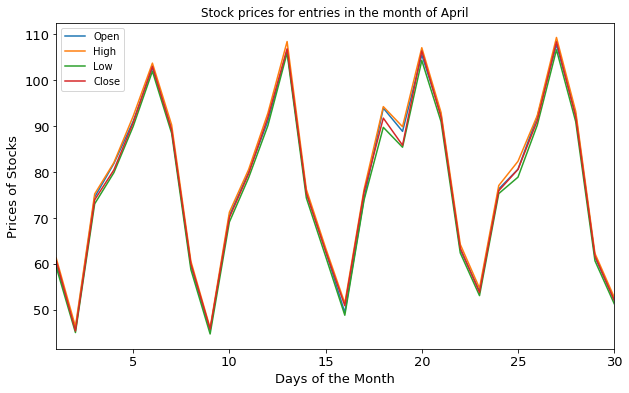

In [437]:
ts11 = ap4.plot(figsize=(10, 6), fontsize=13, title = "Stock prices for entries in the month of April")
ts11.set_xlabel("Days of the Month",fontsize=13)
ts11.set_ylabel("Prices of Stocks",fontsize=13)

This graph shows some interesting results as the average for all the prices seems to vary with the day. It should be also be noted that all days have 3 or 4 entries each(as the next cell shows). It appears that the average prices either increase/decrease for a handful of days, then the graph peaks/troughs and does the opposite again. Even taking into account that some days have different years, I expected this graph to be a lot more even given that averages usually even things out

In [438]:
april4.index.day.value_counts()

15    4
21    4
4     4
7     4
8     4
10    4
11    4
29    4
17    4
1     4
25    4
22    4
28    4
24    4
9     3
2     3
3     3
5     3
6     3
27    3
26    3
20    3
19    3
12    3
13    3
14    3
23    3
16    3
18    3
30    3
Name: Time, dtype: int64

The following code groups the dateset by day and calculates the average stock price for each day

In [439]:
df_day = df1.groupby(df1.index.day).sum()
df_day.head(10)




,Open,High,Low,Close
Time,,,,
1,3521.125745,3579.087122,3476.577160,3538.431445
2,3545.594269,3587.695745,3490.045716,3543.968546
3,3652.915703,3693.571413,3601.268591,3645.794244
4,3315.401436,3370.151433,3265.122861,3332.392849
5,3571.947151,3636.111420,3521.557130,3583.540011
6,3957.184314,4024.974311,3909.004268,3983.888578
7,3882.114293,3925.362842,3813.201468,3861.167120
8,3827.670020,3883.478563,3765.881438,3826.748574
9,3710.635718,3758.967172,3647.308575,3703.538550


Text(0,0.5,'Sum of stock prices')

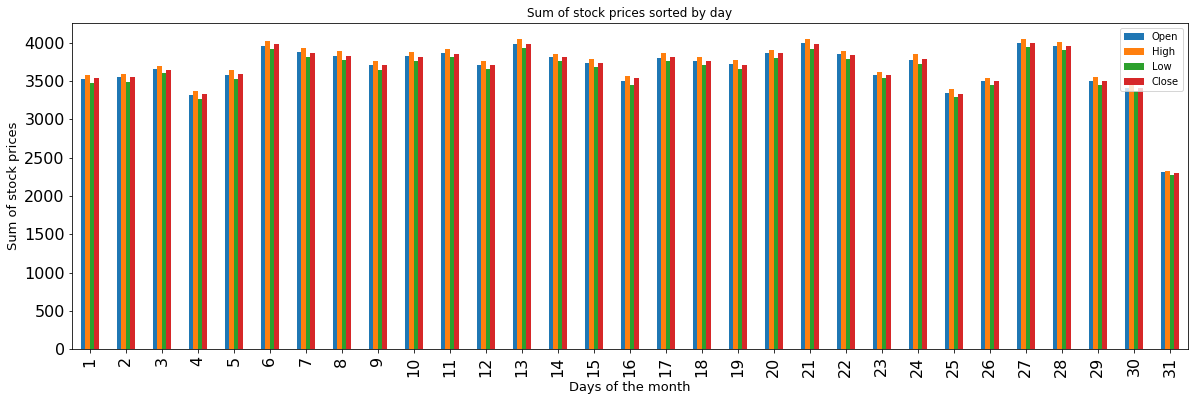

In [440]:
ts7 = df_day.plot(kind = 'bar', figsize=(20, 6), fontsize=16, title = "Sum of stock prices sorted by day")
ts7.set_xlabel("Days of the month",fontsize=13)
ts7.set_ylabel("Sum of stock prices",fontsize=13)

In [441]:
df_day.nlargest(5, "Close")

,Open,High,Low,Close
Time,,,,
27,3999.092854,4050.005705,3939.940009,3995.362870
6,3957.184314,4024.974311,3909.004268,3983.888578
13,3980.264278,4040.751436,3924.188594,3982.058585
21,3989.322877,4044.754274,3921.375701,3977.708534
28,3950.230009,4007.818556,3896.237125,3960.757145


In [442]:
df1.index.day.value_counts().nlargest(31)

11    44
8     43
10    43
22    43
13    43
6     43
21    42
14    42
17    42
12    42
9     42
24    42
7     42
28    42
15    42
20    41
27    41
23    41
18    41
19    41
3     41
5     41
2     40
16    40
4     39
26    39
29    39
1     38
30    38
25    38
31    24
Name: Time, dtype: int64

The results above are interesting. After calculating the top 5 in both largest sum of all days and the number of occurrences, only the 6th day in each month is in both tables. For example. day 27 has the highest sum total when it comes to the closing price of stocks, but it is not in the top 10 in the value counts table. Although it must 

In [443]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-01-02 to 2017-12-29
Data columns (total 4 columns):
Open     1259 non-null float64
High     1259 non-null float64
Low      1259 non-null float64
Close    1259 non-null float64
dtypes: float64(4)
memory usage: 89.2 KB


For this example, I have grouped the dataset into years and have calculated the average prices for each year. As we can see from the graph below, the average prices have increased every year since 2013. The smallest increase in the average prices was from 2015 to 2016, which is then followed by the biggest increase of the 5 years from 2016 to 2017

In [444]:
df_year = df1.groupby(df1.index.year).mean()
df_year.head()

,Open,High,Low,Close
Time,,,,
2013,35.249762,35.875658,34.628787,35.271831
2014,57.516111,58.287222,56.656604,57.495119
2015,91.798016,93.412296,90.205317,91.895674
2016,102.000516,103.569524,100.426746,102.030357
2017,165.402311,167.048725,163.487012,165.374263


Text(0,0.5,'Average Price')

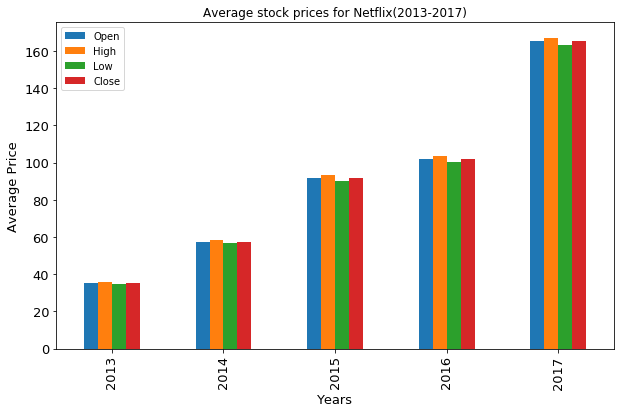

In [445]:
ps2 = df_year.plot(kind = 'bar', figsize=(10, 6), fontsize=13, title = 'Average stock prices for Netflix(2013-2017)')
ps2.set_xlabel("Years",fontsize=13)
ps2.set_ylabel("Average Price",fontsize=13)

As a result of this graph, I decided to investigate the year 2017

In [446]:
year2017 = df1[df1.index.year == 2017]

In [447]:
year2017m = year2017.groupby(year2017.index.month).sum()

Text(0,0.5,'Prices')

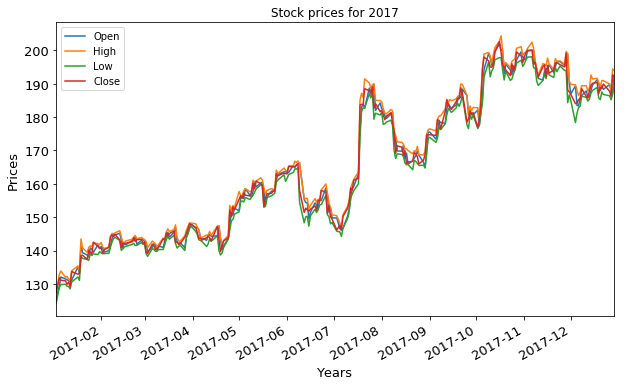

In [448]:
ts9 = year2017.plot(figsize=(10, 6), fontsize=13, title = 'Stock prices for 2017')
ts9.set_xlabel("Years",fontsize=13)
ts9.set_ylabel("Prices",fontsize=13)

In [449]:
year2017.index.month.value_counts()

8     23
3     23
10    22
6     22
5     22
11    21
12    20
9     20
7     20
1     20
4     19
2     19
Name: Time, dtype: int64

This graph also makes interesting reading. I feel that the most interesting point in the graph is the sharp rise in prices between the start of July and the start of August. Perhaps this has got to do with the movies and TV series that were added to it in this time period. Examples include the Titanic, Lion, The Void and Star Wars.

In [450]:
year201707 = year2017["2017-07":"2017-08"]

Text(0,0.5,'Prices')

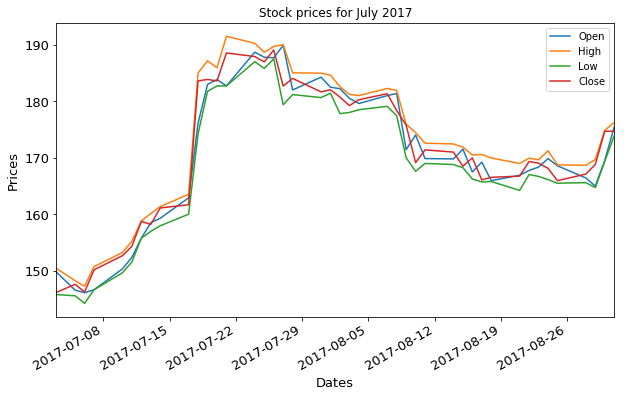

In [451]:
ts16 = year201707.plot(figsize=(10, 6), fontsize=13, title = 'Stock prices for July 2017')
ts16.set_xlabel("Dates",fontsize=13)
ts16.set_ylabel("Prices",fontsize=13)

In [452]:
year201707["2017-07-15": "2017-07-22"]

,Open,High,Low,Close
Time,,,,
2017-07-17,162.910004,163.550003,160.020004,161.699997
2017-07-18,176.119995,185.000000,174.240005,183.600006
2017-07-19,182.970001,187.169998,181.750000,183.860001
2017-07-20,183.839996,185.919998,182.699997,183.600006
2017-07-21,182.720001,191.500000,182.710007,188.539993


As we can see from the data, the stocks experience a huge increase in price in the period from 2017-07-15 to 2017-07-22. Movies such as Railroad Tigers, Star Wars and Uncertain Glory were released during this time. In TV, popular there were popular series such as Last Chance U and Pretty Little Liars were made available on the service during this period.

I decided to investigate the rolling average command to see if it illustrated any different information. I used it for the Open and Close prices 

Text(0,0.5,'Price of Stocks')

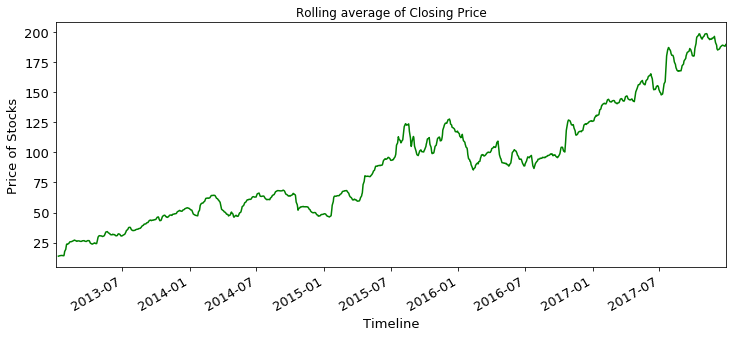

In [453]:
close_price = df1["Close"].rolling(5).mean()
cp = close_price.plot(color = 'green', figsize=(12, 5), fontsize=13, title = "Rolling average of Closing Price")
cp.set_xlabel("Timeline", fontsize = 13)
cp.set_ylabel("Price of Stocks", fontsize = 13)

Text(0,0.5,'Price of Stocks')

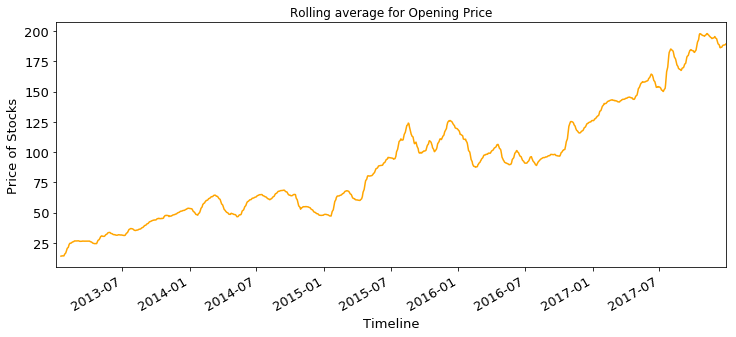

In [454]:
open_price = df1["Open"].rolling(10).mean()
op = open_price.plot(color = 'orange', figsize=(12, 5), fontsize=13, title = "Rolling average for Opening Price")
op.set_xlabel("Timeline", fontsize = 13)
op.set_ylabel("Price of Stocks", fontsize = 13)

The trajectory of the two graphs is similar given how closely related the two prices are to each other. The two graphs experience dips and rises in the same places, even though the Open price graph is smoothed out more.

After invertigating this dataset, the only way for Netflix and online TV seems to be up. The stock prices look set to rise again in 2018 as Netflix expands